# Multi-Layer Perceptron - Higgs Detection

Higgs signal is an exotic signal present all over the world but difficuilt to differentiate from background signals

**A Multi-Layer Perceptron is a feedforward Artificial Neural Network (ANN). that consists of three types of layers: an input layer, hidden layer(s), and output layer.**

The Model creation and evaluation is all done in Ipython and Scikit-learn Deep learning Libraries. MLPClassifier from sklearn library has a preset of classes and parameters which could be called and set accorging to needs.

We aim to create the best MLP model that would classify Higgs signal (class - 1) from background (class - 0). This is a binary classification problem with 29 features in total. The train and test set was split even before preprocessing the training data. Hence test data is not introdced until the final best model is retrived.  

Connecting to Google Drive (comment the below cell if training in Jupyter notebook)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports


All Import required for model creation and evaluation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import os
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline

In [5]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [6]:
import joblib
GOOGLE_MODELS_SAVED = GOOGLE_DRIVE_PATH + '/SavedModels/MLP'

### Preprocessed Data

HiggsPreprocessedData.csv is the training data which was preprocessed in EDA_HiggsDetection.ipynb file and stored in csv format. This has all the features including target variable 'class'.

*This preprocessed training data is inturn split into training and validation data (10%) to evaluate the model*

Test data is introduced only to text on the best model 

In [7]:
higgs_df_train = pd.read_csv(GOOGLE_DRIVE_PATH + '/HiggsPreprocessedData.csv')
higgs_df_train.shape

(77006, 29)

In [8]:
y_train = higgs_df_train['class']
X_train = higgs_df_train.drop(columns='class')

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10)

In [45]:
X_train.shape

(56136, 28)

### Basic Model

A Basic model to understand the computational time and expense is created below with hidden_layer_size = 2.

On training the model with train data, the model is evaluated with validation data

In [24]:
MLPClf_ = MLPClassifier(hidden_layer_sizes=2).fit(X_train, y_train)
print('MLP Classifier trained :')

y_preds=MLPClf_.predict(X_val)
print('Accuracy : ')
print(MLPClf_.score(X_val, y_val))
print('Validation set results : ')
print(classification_report(y_val, y_preds))

MLP Classifier trained :
Accuracy : 
0.6531619270224646
Validation set results : 
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      3573
           1       0.65      0.75      0.70      4128

    accuracy                           0.65      7701
   macro avg       0.65      0.65      0.64      7701
weighted avg       0.65      0.65      0.65      7701



In [33]:
clf_1 = MLPClassifier( hidden_layer_sizes= 2, activation='logistic', random_state = 20)

MLPClf_3 = clf_1.fit(X_train, y_train)

print('MLP Classifier trained with hidden layers nodes : 5, Activation function : logistic')

MLP Classifier trained with hidden layers nodes : 5, Activation function : logistic


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [34]:
y_preds1=MLPClf_3.predict(X_val)
print('Accuracy : ')
print(MLPClf_3.score(X_val, y_val))
print('Validation set results with with hidden layers nodes : 5, Activation function : logistic  ')
print(classification_report(y_val, y_preds1))

Accuracy : 
0.6695234385144786
Validation set results with with hidden layers nodes : 5, Activation function : logistic  
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      3573
           1       0.69      0.71      0.70      4128

    accuracy                           0.67      7701
   macro avg       0.67      0.67      0.67      7701
weighted avg       0.67      0.67      0.67      7701



In [ ]:
clf_2 = MLPClassifier(random_state=20, hidden_layer_sizes=5, activation='relu')

MLPClf_4 = clf_2.fit(X_train, y_train)

print('MLP Classifier trained with hidden layers : 5, Activation function : relu, random state = 20')

MLP Classifier trained with hidden layers : 5, Activation function : relu, random state = 20


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_preds2=MLPClf_4.predict(X_val)
print('Accuracy : ')
print(MLPClf_4.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, y_preds2))

Accuracy : 
0.6768831168831169
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      2663
           1       0.69      0.73      0.71      3112

    accuracy                           0.68      5775
   macro avg       0.67      0.67      0.67      5775
weighted avg       0.68      0.68      0.68      5775



### Grid Search for Ativation function

A grid search is performed on activation function to identify the best activation for this dataset. GridSearchCV() in sklearner is an existing library that can be used to tune the parameter.

In [ ]:
parameters = {'activation' : ['logistic', 'relu', 'tanh']}

clf3 = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=4).fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(clf3.best_params_)

{'activation': 'logistic'}


In [ ]:
result1 = clf3.cv_results_
result1

{'mean_fit_time': array([107.88673348,  84.08345866, 106.29938221]),
 'mean_score_time': array([0.06941824, 0.02834787, 0.07051129]),
 'mean_test_score': array([0.69443547, 0.69332718, 0.68707766]),
 'param_activation': masked_array(data=['logistic', 'relu', 'tanh'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'logistic'},
  {'activation': 'relu'},
  {'activation': 'tanh'}],
 'rank_test_score': array([1, 2, 3], dtype=int32),
 'split0_test_score': array([0.70376356, 0.69514354, 0.69606711]),
 'split1_test_score': array([0.69160317, 0.69183406, 0.6882937 ]),
 'split2_test_score': array([0.69291157, 0.69437389, 0.68190564]),
 'split3_test_score': array([0.6880628 , 0.69460479, 0.68321404]),
 'split4_test_score': array([0.69583622, 0.6906796 , 0.6859078 ]),
 'std_fit_time': array([ 0.75909086,  1.55973135, 13.6399145 ]),
 'std_score_time': array([0.00702866, 0.0026133 , 0.01221008]),
 'std_test_score': array([0.00

**GRID SEARCH - 1 RESULTS**

The result showed that logistic is the best activation function for this dataset, but when combined with other set of parameters we have to identify which is the best activation function and also hidden layer

*We split the grid search because the data is huge, the search become very time consuming as the number of fits increases with many combinations are avaibale.*




In [ ]:
parameters = {  'hidden_layer_sizes': [10, 20, 50, 100], 'activation' : ['logistic', 'relu']}

clf4 = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=4).fit(X_train, y_train)
print(clf4.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'activation': 'relu', 'hidden_layer_sizes': 50}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
result2 = clf4.cv_results_
result2

{'mean_fit_time': array([ 49.07641449,  60.05024347,  72.43873796, 102.13406796,
         42.83842516,  47.89261079,  60.37309618,  74.67126994]),
 'mean_score_time': array([0.01353493, 0.02847543, 0.03616247, 0.0643549 , 0.00904212,
        0.01092434, 0.01723175, 0.02626619]),
 'mean_test_score': array([0.683291  , 0.68946356, 0.68830909, 0.69243439, 0.68874009,
        0.69586701, 0.6969599 , 0.69209574]),
 'param_activation': masked_array(data=['logistic', 'logistic', 'logistic', 'logistic', 'relu',
                    'relu', 'relu', 'relu'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[10, 20, 50, 100, 10, 20, 50, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'logistic', 'hidden_layer_sizes': 10},
  {'activation': 'logistic', 'hidden_la

**GRID SEARCH - 2 RESULTS**

*On combining activation function and hidden layers, it can be observed that activation : relu and hidden layers nodes : 50 gives a better result*

Further performing grid search with multi layerd hidden layers to see if the accuracy of validation set increases. Again activation is given both logistic and relu for grid search to identify the best parameter as in the previous runs one gave logistic and other gave relu


In [ ]:
parameters = {  'hidden_layer_sizes': [5 , (5, 30), 10, (10, 30), 25 , (25, 35) , 50, 100], 'activation' : ['logistic', 'relu']}
# parameters = {'activation' : ['logistic', 'relu', 'tanh']}

clf_5_1 = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=4).fit(X_train, y_train)
print(clf_5_1.best_params_)

joblib.dump(clf_5_1, GOOGLE_MODELS_SAVED + '/clf_5_1_hidden_and_nodes.pkl')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'activation': 'relu', 'hidden_layer_sizes': (25, 35)}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/MLP/clf_5_1_hidden_and_nodes.pkl']

In [ ]:
result3 = clf_5_1.cv_results_
result3

{'mean_fit_time': array([ 48.44974761,  71.96911707,  48.34943953,  76.28526993,
         58.39257383,  90.89141831,  73.60890355, 105.32863612,
         28.12802196,  66.40368104,  46.74141932,  70.66350675,
         58.30057931,  88.64038324,  69.88222361,  82.09790931]),
 'mean_score_time': array([0.01270595, 0.03076129, 0.01482687, 0.03579006, 0.02375202,
        0.04776564, 0.04050307, 0.07368007, 0.00958476, 0.01975927,
        0.01110468, 0.02292967, 0.01710653, 0.03337393, 0.02484856,
        0.03448677]),
 'mean_test_score': array([0.68267529, 0.67965828, 0.68773955, 0.68592319, 0.68889402,
        0.69100285, 0.68955591, 0.6893712 , 0.67126914, 0.69974602,
        0.68384515, 0.70188563, 0.69526668, 0.70625722, 0.69528207,
        0.69051027]),
 'param_activation': masked_array(data=['logistic', 'logistic', 'logistic', 'logistic',
                    'logistic', 'logistic', 'logistic', 'logistic', 'relu',
                    'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 're

### BEST PARAMETERS - 1

*The best parameters after tuning is observed to be 2 hidden layers of each having 25 and 35 nodes and activation function as 'relu'*

*Going forword we will be working with relu as activation function*


A model is trained and fit with these parameters and validated with the validation set. the previous two grid searchs resulted in two results, one was one layer with 50 nodes, other best hidden layer is two layers with 25, 30 nodes respectively, so performing cross validation with these parameters to yeild better results

In [ ]:
MLPClf_51 = MLPClassifier(hidden_layer_sizes = (25, 35), activation = 'relu').fit(X_train, y_train)

y_preds3=MLPClf_51.predict(X_val)
print('Accuracy : ')
print(MLPClf_51.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, y_preds3))

Accuracy : 
0.7110403102922842
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.70      0.65      0.68      3350
           1       0.72      0.76      0.74      3869

    accuracy                           0.71      7219
   macro avg       0.71      0.71      0.71      7219
weighted avg       0.71      0.71      0.71      7219



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
MPL_cv_scores_51 = cross_val_score(MLPClf_51, X_train, y_train, cv=5)

MPL_cv_scores_51

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

array([0.70822751, 0.70245517, 0.70430232, 0.70337874, 0.70599554])

The best set of parameters
 at {'activation': 'relu', 'hidden_layer_sizes': 50}

In [ ]:
# best_param_ = {'activation': 'relu', 'hidden_layer_sizes': 50}

MLPClf_5 = MLPClassifier(hidden_layer_sizes = 50, activation = 'relu').fit(X_train, y_train)

y_preds3=MLPClf_5.predict(X_val)
print('Accuracy : ')
print(MLPClf_5.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, y_preds3))

Accuracy : 
0.7027289098213049
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      3350
           1       0.71      0.75      0.73      3869

    accuracy                           0.70      7219
   macro avg       0.70      0.70      0.70      7219
weighted avg       0.70      0.70      0.70      7219



In [ ]:
MPL_cv_scores_1 = cross_val_score(MLPClf_5, X_train, y_train, cv=5)

MPL_cv_scores_1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

array([0.68429154, 0.69614408, 0.69622104, 0.6989148 , 0.69645194])

**It can be observed that two hidden layer with 25, 30 nodes respectively with relu activation function gives better result**

### Standerdiseing Data for PCA

*Ref : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60*

*Ref : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*


It is a good practice to standerdise data before performing MLP, and also in an aim to improve performance a principal component analysis is done on the training set with different coverage (0.95, 0.97, 0.99) of attributes. Also models are evaluated  with standerdised PCA and without standerdised PCA with hidden layers (25, 25) and activation function relu

In [ ]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_scaler = scaler.transform(X_train)

In [ ]:
train_scaler

array([[ 1.03077323e+00, -6.31659065e-01,  5.55961714e-02, ...,
         1.75612352e+00,  6.08805799e-01,  3.29194842e-01],
       [ 5.48485343e-01,  1.14011025e+00,  1.15568781e+00, ...,
        -5.98142196e-01, -6.46739946e-01, -8.31684074e-01],
       [-6.24776559e-01,  6.54521429e-01, -1.25634733e+00, ...,
        -5.71941778e-01, -9.65298216e-01, -7.91088968e-01],
       ...,
       [ 3.64270755e-01,  1.48578533e-01, -4.66153352e-01, ...,
         9.62141612e-01,  9.30115098e-01,  4.97511467e-01],
       [-6.99889707e-01, -1.60608771e-01,  3.56122487e-01, ...,
         7.57223982e-04,  8.67932428e-01,  4.70681001e-01],
       [-9.99662850e-01, -6.00643380e-01,  1.04319733e+00, ...,
         2.05164122e-01,  1.51644239e-01, -1.04560114e-01]])

In [ ]:
pca = PCA(.95)
pca1 = pca.fit_transform(train_scaler)
pca1.shape

(64965, 23)

In [ ]:
pca.explained_variance_ratio_

array([0.13885902, 0.06736003, 0.06379252, 0.04946378, 0.04840618,
       0.04636658, 0.04524005, 0.044358  , 0.04295407, 0.03888531,
       0.03868175, 0.03775829, 0.03685797, 0.03155603, 0.03089586,
       0.02978946, 0.02802315, 0.02638866, 0.02595262, 0.02254196,
       0.02129574, 0.01989115, 0.01770979])

In [ ]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), MLPClassifier())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_val)

In [ ]:
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_val, pred_test_std):.2%}\n")


Prediction accuracy for the normal test dataset with PCA
56.55%



In [ ]:
print('Accuracy : ')
print(std_clf.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, pred_test_std))

Accuracy : 
0.5654522787089624
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.54      0.43      0.48      3350
           1       0.58      0.69      0.63      3869

    accuracy                           0.57      7219
   macro avg       0.56      0.56      0.55      7219
weighted avg       0.56      0.57      0.56      7219



In [ ]:
std_clf51 = make_pipeline(StandardScaler(), PCA(0.95), MLPClassifier(hidden_layer_sizes = (25, 35), activation = 'relu'))
std_clf51.fit(X_train, y_train)
pred_val_std = std_clf51.predict(X_val)

print('Accuracy : ')
print(std_clf51.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, pred_val_std))

Accuracy : 
0.6786258484554647
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      3350
           1       0.70      0.70      0.70      3869

    accuracy                           0.68      7219
   macro avg       0.68      0.68      0.68      7219
weighted avg       0.68      0.68      0.68      7219



In [ ]:
std_clf1 = make_pipeline(StandardScaler(), PCA(n_components=20), MLPClassifier(hidden_layer_sizes = 50, activation = 'relu'))
std_clf1.fit(X_train, y_train)
pred_test_std = std_clf1.predict(X_val)

In [ ]:
print('Accuracy : ')
print(std_clf1.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, pred_test_std))

Accuracy : 
0.6511982269012329
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.64      0.56      0.60      3350
           1       0.66      0.73      0.69      3869

    accuracy                           0.65      7219
   macro avg       0.65      0.65      0.65      7219
weighted avg       0.65      0.65      0.65      7219



In [ ]:
pca = PCA(0.95)

x_pca = pca.fit_transform(X_train)

print(x_pca.shape)
pca.explained_variance_ratio_

(64965, 19)


array([0.11857291, 0.099966  , 0.08644029, 0.07255706, 0.06639667,
       0.05796887, 0.05759269, 0.05616057, 0.05485031, 0.04616458,
       0.04175469, 0.03899919, 0.03846471, 0.03113024, 0.0264493 ,
       0.01914977, 0.01880117, 0.01498932, 0.01381715])

In [ ]:
pca = PCA(0.97)

x_pca = pca.fit_transform(X_train)

print(x_pca.shape)
pca.explained_variance_ratio_

(64965, 20)


array([0.11857291, 0.099966  , 0.08644029, 0.07255706, 0.06639667,
       0.05796887, 0.05759269, 0.05616057, 0.05485031, 0.04616458,
       0.04175469, 0.03899919, 0.03846471, 0.03113024, 0.0264493 ,
       0.01914977, 0.01880117, 0.01498932, 0.01381715, 0.01000232])

In [ ]:
pca = PCA(0.99)

x_pca = pca.fit_transform(X_train)

print(x_pca.shape)
pca.explained_variance_ratio_

(64965, 24)


array([0.11857291, 0.099966  , 0.08644029, 0.07255706, 0.06639667,
       0.05796887, 0.05759269, 0.05616057, 0.05485031, 0.04616458,
       0.04175469, 0.03899919, 0.03846471, 0.03113024, 0.0264493 ,
       0.01914977, 0.01880117, 0.01498932, 0.01381715, 0.01000232,
       0.00759765, 0.0065112 , 0.00544163, 0.00500464])

Text(0, 0.5, 'Cum Variance')

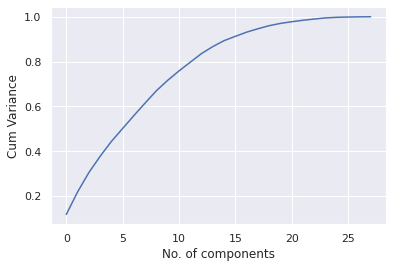

In [ ]:
# from sklearn.decomposition import PCA
pca = PCA(n_components = 28)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel ("No. of components")
plt.ylabel ( "Cum Variance")

The below code was run with different percentage of PCA (0.95, 0.97, 0.98, 0.99)

In [ ]:
for pca_per in [0.95, 0.97, 0.98, 0.99] : 
  print('PCA percentage set to : ' , pca_per)
  pca_clf_51 = make_pipeline( PCA(pca_per), MLPClassifier(hidden_layer_sizes = (25, 35), activation = 'relu'))
  pca_clf_51.fit(X_train, y_train)
  pred_test_pca = pca_clf_51.predict(X_val)

  print('Accuracy : ')
  print(pca_clf_51.score(X_val, y_val))
  print('Validation set results with 2 Hidden layers : ')
  print(classification_report(y_val, pred_test_pca))

PCA percentage set to :  0.95
Accuracy : 
0.6403934062889597
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      3350
           1       0.65      0.71      0.68      3869

    accuracy                           0.64      7219
   macro avg       0.64      0.63      0.63      7219
weighted avg       0.64      0.64      0.64      7219

PCA percentage set to :  0.97


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy : 
0.6457958165950963
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      3350
           1       0.66      0.70      0.68      3869

    accuracy                           0.65      7219
   macro avg       0.64      0.64      0.64      7219
weighted avg       0.64      0.65      0.64      7219

PCA percentage set to :  0.98


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy : 
0.6560465438426375
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      3350
           1       0.68      0.68      0.68      3869

    accuracy                           0.66      7219
   macro avg       0.65      0.65      0.65      7219
weighted avg       0.66      0.66      0.66      7219

PCA percentage set to :  0.99
Accuracy : 
0.6834741653968693
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3350
           1       0.70      0.72      0.71      3869

    accuracy                           0.68      7219
   macro avg       0.68      0.68      0.68      7219
weighted avg       0.68      0.68      0.68      7219



In [ ]:
pca_clf = make_pipeline( PCA(n_components=23), MLPClassifier(hidden_layer_sizes = 50, activation = 'relu'))
pca_clf.fit(X_train, y_train)
pred_test_pca = pca_clf.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('Accuracy : ')
print(pca_clf.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, pred_test_pca))

Accuracy : 
0.662003047513506
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      3350
           1       0.67      0.73      0.70      3869

    accuracy                           0.66      7219
   macro avg       0.66      0.66      0.66      7219
weighted avg       0.66      0.66      0.66      7219



Trying different components - a trial and error method 

In [ ]:
pca_clf_2 = make_pipeline( PCA(n_components = 'mle', svd_solver = 'full'), MLPClassifier(hidden_layer_sizes = (25, 35), activation = 'relu'))
pca_clf_2.fit(X_train, y_train)
pred_test_pca2 = pca_clf_2.predict(X_val)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('Accuracy : ')
print(pca_clf_2.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, pred_test_pca2))

Accuracy : 
0.7050838066214157
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3350
           1       0.73      0.71      0.72      3869

    accuracy                           0.71      7219
   macro avg       0.70      0.70      0.70      7219
weighted avg       0.71      0.71      0.71      7219



*Ref : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py*



*Though 0.95 percentage of data is being coverd by 19 variables it is not enough when trying to validate data, 0.99 has 27 attributes and performs better in validations set after being standerdised.*




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



Prediction accuracy for the normal test dataset with PCA
67.20%


Prediction accuracy for the standardized test dataset with PCA
70.36%


PC 1 without scaling:
[-7.03595148e-04  1.46454412e-02  1.64279089e-03  9.47974777e-04
  1.77170442e-03 -1.84975855e-03  1.35567298e-02 -6.66445639e-04
 -1.30711783e-01 -6.43604351e-03  5.13640744e-03 -9.25436632e-04
 -1.48526542e-01 -2.19166424e-02  2.16475334e-02 -2.17961652e-03
 -3.70944613e-01  7.45842500e-02  7.99694557e-03  1.81517625e-03
  8.99539320e-01  3.52627210e-02  2.60750925e-03 -1.03971660e-03
 -2.06626867e-02 -7.05069535e-02 -1.86641038e-02 -4.87246879e-03]

PC 1 with scaling:
[ 4.73842721e-02  1.76831036e-03  3.76020105e-03  1.20971354e-01
  3.74171843e-04  2.99602017e-01 -9.03509189e-04 -4.92521952e-03
  1.22575684e-02  2.86545905e-01 -6.23945297e-03  3.66827452e-03
  3.84292173e-02  2.27035850e-01  4.63020402e-04  5.97554442e-03
  5.03946609e-03  1.49930156e-01  4.44525694e-04 -1.69035493e-03
 -2.93564451e-02  2.38845821e-01  3.16

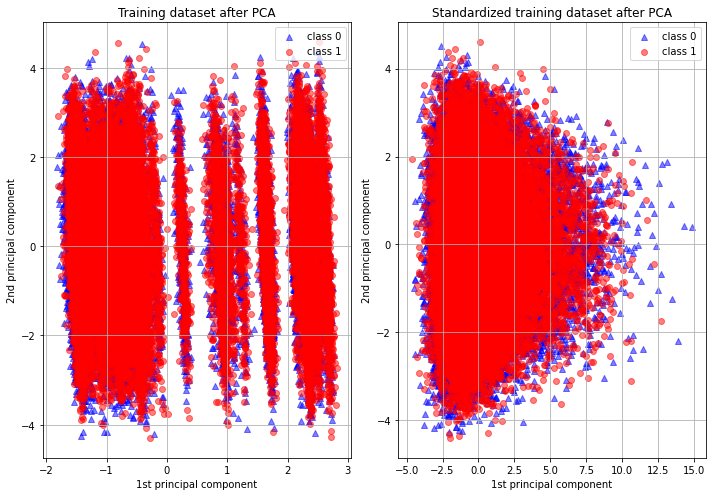

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(0.99), MLPClassifier(hidden_layer_sizes = 50, activation = 'relu'))
unscaled_clf.fit(X_train, y_train)
pred_val = unscaled_clf.predict(X_val)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(0.99), MLPClassifier(hidden_layer_sizes = 50, activation = 'relu'))
std_clf.fit(X_train, y_train)
pred_val_std = std_clf.predict(X_val)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_val, pred_val):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_val, pred_val_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = [0, 1]
colors = ("blue", "green")
markers = ("^", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

MLP model building on training set with the whole dataset is very time consuming, so subsampling few records to run grid search to get the best set of parameters. This best set of parameters willl be used to retrain the final model


PCA (0.99) with standerdised data gives better results hence sampleling 8000 records and performing standardization and PCA and run grid search to identify other parameters

In [ ]:
higgs_df_sample = higgs_df_train.sample(n = 8000)
higgs_df_sample.shape

(8000, 29)

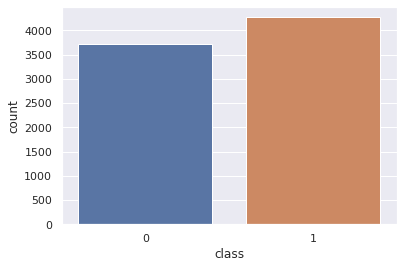

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class", data=higgs_df_sample)

In [ ]:
y_sample = higgs_df_sample['class']
X_sample = higgs_df_sample.drop(columns='class')

X_train_sample, X_val_sample, y_train_sample, y_val_sample = train_test_split(X_sample, y_sample, test_size = 0.10, random_state = 20)

In [ ]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_sample)
# Apply transform to both the training set and the test set.
X_train_sample = scaler.transform(X_train_sample)
X_val_sample = scaler.transform(X_val_sample)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.99)

pca.fit(X_train_sample)

X_train_sample = pca.transform(X_train_sample)
X_val_sample = pca.transform(X_val_sample)

X_train_sample.shape

(7200, 23)

In [ ]:
import joblib
GOOGLE_MODELS_SAVED = GOOGLE_DRIVE_PATH + '/SavedModels/MLP'

In [ ]:
parameters = { 'max_iter': [100, 300, 500, 1000 ],  'random_state':[5, 10, 20], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate_init' : [0.05, 0.01, 0.005, 0.001], 
              'hidden_layer_sizes': [50], 'activation' : ['relu'] }
# parameters = {'activation' : ['logistic', 'relu', 'tanh']}

clf5 = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=4).fit(X_train_sample, y_train_sample)
print(clf5.best_params_)


GOOGLE_MODELS_SAVED = GOOGLE_DRIVE_PATH + '/SavedModels/MLP'

joblib.dump(clf5, GOOGLE_MODELS_SAVED + '/MLP_Grid_clf5_afterPCAScalar.pkl')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate_init': 0.001, 'max_iter': 100, 'random_state': 5}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/MLP/MLP_Grid_clf5_afterPCAScalar.pkl']

**The best set of parameters on sampled data {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate_init': 0.001, 'max_iter': 100, 'random_state': 5}**



## Dataset Columns

Data set columns are ['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b-tag', 'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag', 'jet3pt', 'jet3eta', 'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b-tag'] are the actual

where as these are calucalated ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']


The first set of attributes are not highly corelated but the second set of values which are the calculated fields arr highly corelated, experimenting on these columns to check if they seperatly have impacts on models

In [ ]:
X_train.shape

(64965, 28)

In [ ]:
X_train.columns

Index(['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b-tag',
       'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag', 'jet3pt', 'jet3eta',
       'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')

In [ ]:
X_train_high = X_train[['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b-tag',
       'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag', 'jet3pt', 'jet3eta',
       'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b-tag']]

X_val_high = X_val[['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b-tag',
       'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag', 'jet3pt', 'jet3eta',
       'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b-tag']]

In [ ]:
MLPClf_6 = MLPClassifier(hidden_layer_sizes = (25, 30), activation = 'relu', alpha = 0.001, learning_rate_init = 0.001, max_iter= 100, random_state= 5).fit(X_train_high, y_train)

y_preds6=MLPClf_6.predict(X_val_high)
print('Accuracy : ')
print(MLPClf_6.score(X_val_high, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, y_preds6))

Accuracy : 
0.6395622662418617
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.62      0.57      0.59      3350
           1       0.65      0.70      0.68      3869

    accuracy                           0.64      7219
   macro avg       0.64      0.63      0.64      7219
weighted avg       0.64      0.64      0.64      7219



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
X_train_cal = X_train[['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']]

X_val_cal = X_val[['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']]

X_train_cal.shape

(64965, 7)

In [ ]:
MLPClf_7 = MLPClassifier(hidden_layer_sizes = (25, 30), activation = 'relu', alpha = 0.001, learning_rate_init = 0.001, max_iter= 100, random_state= 5).fit(X_train_cal, y_train)

y_preds7=MLPClf_7.predict(X_val_cal)
print('Accuracy : ')
print(MLPClf_7.score(X_val_cal, y_val))
print('Validation set results : ')
print(classification_report(y_val, y_preds7))

Accuracy : 
0.6956642194209725
Validation set results : 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      3350
           1       0.72      0.71      0.72      3869

    accuracy                           0.70      7219
   macro avg       0.69      0.69      0.69      7219
weighted avg       0.70      0.70      0.70      7219



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
X_train_cal = X_train_sample[['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']]

X_val_cal = X_val_sample[['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']]

X_train_cal.shape

(7200, 7)

In [ ]:
parameters = { 'max_iter': [100, 300, 500  ],  'random_state':[5, 10, 20], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate_init' : [0.05, 0.01, 0.005, 0.001], 
              'hidden_layer_sizes': [5 , 10, (10, 30), 25 , (25, 35) , 50 ], 'activation' : ['relu'] }
# parameters = {'activation' : ['logistic', 'relu', 'tanh']}

clf7 = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=4).fit(X_train_cal, y_train_sample)
print(clf7.best_params_)


GOOGLE_MODELS_SAVED = GOOGLE_DRIVE_PATH + '/SavedModels/MLP'

joblib.dump(clf7, GOOGLE_MODELS_SAVED + '/MLP_Grid_clf7_aftercol_calcol.pkl')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (25, 35), 'learning_rate_init': 0.005, 'max_iter': 300, 'random_state': 10}


['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/MLP/MLP_Grid_clf7_aftercol_calcol.pkl']

In [ ]:
pd.DataFrame(clf7.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.440281,0.252509,0.003711,0.000639,relu,0.0001,5,0.05,100,5,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.536111,0.536111,0.536111,0.536111,0.613194,0.551528,0.030833,646
1,1.271991,0.279760,0.003469,0.000522,relu,0.0001,5,0.05,100,10,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.652083,0.620833,0.634028,0.627778,0.621528,0.631250,0.011461,607
2,1.832831,0.338331,0.003322,0.000289,relu,0.0001,5,0.05,100,20,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.640972,0.625000,0.618056,0.633333,0.624306,0.628333,0.007971,616
3,0.816501,0.502040,0.004472,0.002829,relu,0.0001,5,0.05,300,5,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.536111,0.536111,0.536111,0.536111,0.613194,0.551528,0.030833,646
4,2.220341,0.349802,0.003038,0.000404,relu,0.0001,5,0.05,300,10,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.652083,0.620833,0.634028,0.627778,0.621528,0.631250,0.011461,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,7.738694,0.574507,0.003953,0.000178,relu,0.01,50,0.001,300,10,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.678472,0.666667,0.684028,0.697222,0.663194,0.677917,0.012277,152
644,7.591255,0.527575,0.003832,0.000234,relu,0.01,50,0.001,300,20,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.668056,0.665972,0.682639,0.679861,0.659722,0.671250,0.008658,240
645,8.316577,0.739338,0.003941,0.000134,relu,0.01,50,0.001,500,5,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.681250,0.680556,0.693056,0.702778,0.670139,0.685556,0.011261,47
646,8.772695,2.099852,0.004692,0.001384,relu,0.01,50,0.001,500,10,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.678472,0.675694,0.693056,0.702778,0.663194,0.682639,0.013840,89


**RESULTS**

*In the above implementation it can be observed that the calculated fields alone ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'] produce 70% accuracy on validation set. Because they are highly corelated, this could lead to overfitting and so we are not going to use only these variables to create model, we are going to stick with the previous approch where PCA was 0.99*



**BEST SET OF PARAMETERS TRAINING**

From all the above observations the best set of parameters are chosen and MLP is trained 



In [ ]:
MLPClf_8 = MLPClassifier(hidden_layer_sizes = (25, 35), activation = 'relu', alpha = 0.001, learning_rate_init = 0.005, max_iter= 300, random_state= 10).fit(X_train, y_train)

y_preds8=MLPClf_8.predict(X_val)
print('Accuracy : ')
print(MLPClf_8.score(X_val, y_val))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val, y_preds8))

Accuracy : 
0.7168582906219698
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3350
           1       0.74      0.72      0.73      3869

    accuracy                           0.72      7219
   macro avg       0.72      0.72      0.72      7219
weighted avg       0.72      0.72      0.72      7219



**Model parameter chosen from paper** 

These set of parameters are chosen from the ref paper "*Searching for exotic particles in high-energy physics with deep learning by P. Baldi, P. Sadowski & D. Whiteson*". not all parameters are mentioned, so building on ehat is mentioned and the rest we are choosing from the above observed parameters




In [ ]:
MLPClf_10 = MLPClassifier(hidden_layer_sizes = (300, 300, 300, 300, 300), activation = 'relu', alpha = 0.001, learning_rate_init = 0.005, max_iter= 300, random_state= 10).fit(X_train_sample , y_train_sample)

y_preds10=MLPClf_10.predict(X_val_sample)
print('Accuracy : ')
print(MLPClf_10.score(X_val_sample, y_val_sample))
print('Validation set results with 2 Hidden layers : ')
print(classification_report(y_val_sample, y_preds10))

Accuracy : 
0.64625
Validation set results with 2 Hidden layers : 
              precision    recall  f1-score   support

           0       0.59      0.82      0.68       373
           1       0.76      0.49      0.60       427

    accuracy                           0.65       800
   macro avg       0.67      0.66      0.64       800
weighted avg       0.68      0.65      0.64       800



# Best Model Training 



Best set of parameters in whole dataset {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate_init': 0.001, 'max_iter': 100, 'random_state': 5}

Standardize and PCA 0.99



In [11]:
scaler = StandardScaler()  
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_F = scaler.transform(X_train)
X_val_F = scaler.transform(X_val)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.99)

pca.fit(X_train_F)

X_train_F = pca.transform(X_train_F)
X_val_F = pca.transform(X_val_F)

X_train_F.shape

(69305, 27)

In [38]:
MLPClf_final = MLPClassifier(activation =  'relu', alpha = 0.001, hidden_layer_sizes = (25, 35), learning_rate_init = 0.005, max_iter = 300, random_state = 10).fit(X_train_F, y_train)

y_preds5=MLPClf_final.predict(X_val_F)
print('Accuracy : ')
print(MLPClf_final.score(X_val_F, y_val))
print('Validation set results  : ')
print(classification_report(y_val, y_preds5))

Accuracy : 
0.714582521750422
Validation set results  : 
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      3565
           1       0.73      0.74      0.74      4136

    accuracy                           0.71      7701
   macro avg       0.71      0.71      0.71      7701
weighted avg       0.71      0.71      0.71      7701



In [ ]:
MLPClf_final.get_params()

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (25, 30),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [15]:
MPL_Final_cv_scores = cross_val_score(MLPClf_final, X_train, y_train, cv=5)

MPL_Final_cv_scores

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([0.7055768 , 0.71351273, 0.70961691, 0.70781329, 0.70644254])

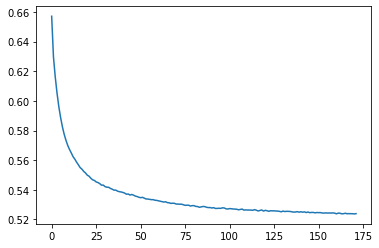

In [14]:
plt.plot(MLPClf_final.loss_curve_)

In [39]:
GOOGLE_MODELS_SAVED = GOOGLE_DRIVE_PATH + '/SavedModels/MLP'

joblib.dump(MLPClf_final, GOOGLE_MODELS_SAVED + '/MLP_FinalModelwithBestParameters.pkl')

['drive/My Drive/ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing/SavedModels/MLP/MLP_FinalModelwithBestParameters.pkl']

*Ref : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html*



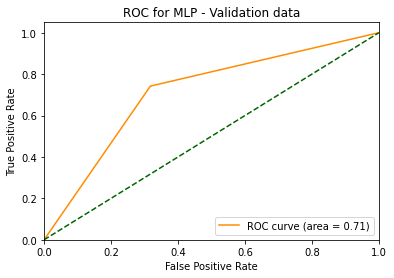

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

MLPVal_fpr, MLPVal_tpr, MLPVal_thresholds = roc_curve(y_val, y_preds5)
roc_auc = auc(MLPVal_fpr, MLPVal_tpr)

plt.figure()
plt.plot(MLPVal_fpr, MLPVal_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="darkgreen",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for MLP - Validation data")
plt.legend(loc="lower right")
plt.show()


In [22]:
#-------------------------------------------------------END OF TRAINING--------------------------------------#

## Testing

Now that the best set of parameters and best model is created, this model is saved and can be loaded any where by using **load(pkl_file_path)** . This need not be trained going further, any data can be directly tested with the below lined of code

In [58]:
from joblib import dump, load


TEST_GOOGLE_FOLDER = GOOGLE_DRIVE_PATH + '/SavedModels/TestingBestModels'


In [59]:
X_test = pd.read_csv(TEST_GOOGLE_FOLDER+'/X_test_data.csv')
y_test = pd.read_csv(TEST_GOOGLE_FOLDER+'/y_test_data.csv')

In [60]:
BestClassifier_MLP = load(TEST_GOOGLE_FOLDER + '/MLP_FinalModelwithBestParameters.pkl') 

In [61]:
scaler_test = StandardScaler()  
scaler_test.fit(X_test)

X_test = scaler_test.transform(X_test)


from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components = 27)

pca.fit(X_test)

X_test = pca.transform(X_test)


y_preds_test = BestClassifier_MLP.predict(X_test)

print('MLP Accuracy on Test data: ')
print(BestClassifier_MLP.score(X_test, y_test))

print('MLP Results for Test data  : ')
print(classification_report(y_test, y_preds_test))

MLP Accuracy on Test data: 
0.5782253952065273
MLP Results for Test data  : 
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      9205
           1       0.59      0.66      0.62     10405

    accuracy                           0.58     19610
   macro avg       0.58      0.57      0.57     19610
weighted avg       0.58      0.58      0.58     19610



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


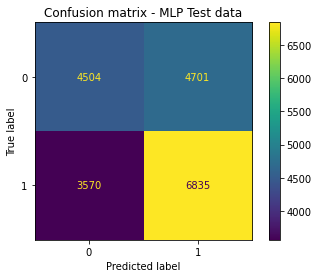

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(BestClassifier_MLP, X_test, y_test)  
plt.title('Confusion matrix - MLP Test data')
plt.show()

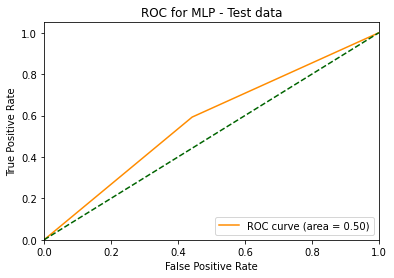

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

MLPTEST_fpr, MLPTEST_tpr, MLPTEST_thresholds = roc_curve(y_preds_test, y_test)
roc_auc_TEST = auc(MLPTEST_fpr, MLPTEST_fpr)

plt.figure()
plt.plot(MLPTEST_fpr, MLPTEST_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc_TEST,)
plt.plot([0, 1], [0, 1], color="darkgreen",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for MLP - Test data")
plt.legend(loc="lower right")
plt.show()


ROC - Validation and Test

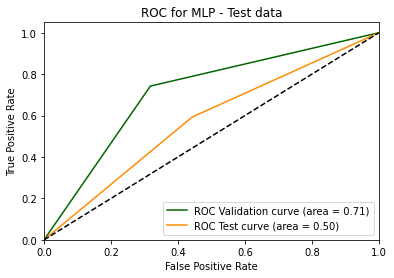

In [64]:
MLPTEST_fpr, MLPTEST_tpr, MLPTEST_thresholds = roc_curve(y_preds_test, y_test)
roc_auc_TEST = auc(MLPTEST_fpr, MLPTEST_fpr)

plt.figure()
plt.plot(MLPVal_fpr, MLPVal_tpr, color="darkgreen",
label="ROC Validation curve (area = %0.2f)" % roc_auc,)
plt.plot(MLPTEST_fpr, MLPTEST_tpr, color="darkorange",
label="ROC Test curve (area = %0.2f)" % roc_auc_TEST,)
plt.plot([0, 1], [0, 1], color="black",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for MLP - Test data")
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.plot(MLPVal_fpr, MLPVal_tpr, color="darkorange",
label="ROC curve (area = %0.2f)" % roc_auc,)